### Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

### Read CSV file and obtain the location (Bilbao Magisterio, same as K-means)

In [13]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2'
df_location = df_location[(df_location["location"] == 'BIZ-Leioa > Magisterio > P0') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P1') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P2') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P3')]

# Show
df_location

,location,ap_name
9,BIZ-Leioa > Magisterio > P3,AP-EGB-Leioa-1142-U016992
22,BIZ-Leioa > Magisterio > P0,AP-EGB-Leioa-1142-U010867
27,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U034559
79,BIZ-Leioa > Magisterio > P3,AP-EGB-Leioa-1702-U024658
110,BIZ-Leioa > Magisterio > P3,AP-EGB-Leioa-1142-U010875
...,...,...
69680,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-1142-U010865
69781,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-1142-U010888
69783,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U034564
69787,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U032095


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [14]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show
df_ap_filter

,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
485,AP-EGB-3702-U034482,"109,8",4.0
521,AP-EGB-Leioa-1142-U010865,"9353,2",33.0
522,AP-EGB-Leioa-1142-U010866,"6481,6",39.0
523,AP-EGB-Leioa-1142-U010867,"60486,5",94.0
524,AP-EGB-Leioa-1142-U010868,"2623,5",14.0
525,AP-EGB-Leioa-1142-U010870,"6694,1",20.0
526,AP-EGB-Leioa-1142-U010871,"12087,1",21.0
527,AP-EGB-Leioa-1142-U010872,"5167,7",17.0
528,AP-EGB-Leioa-1142-U010873,"4208,4",11.0
529,AP-EGB-Leioa-1142-U010874,"1589,5",20.0


### Drop the unnecsary data

In [15]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)

# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 485 to 576
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     57 non-null     float64
 1   cuenta_de_ip_address  57 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\32999323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\32999323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\32999323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### DBSCAN
* For random eps value and min_samples value 

C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\960278207.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


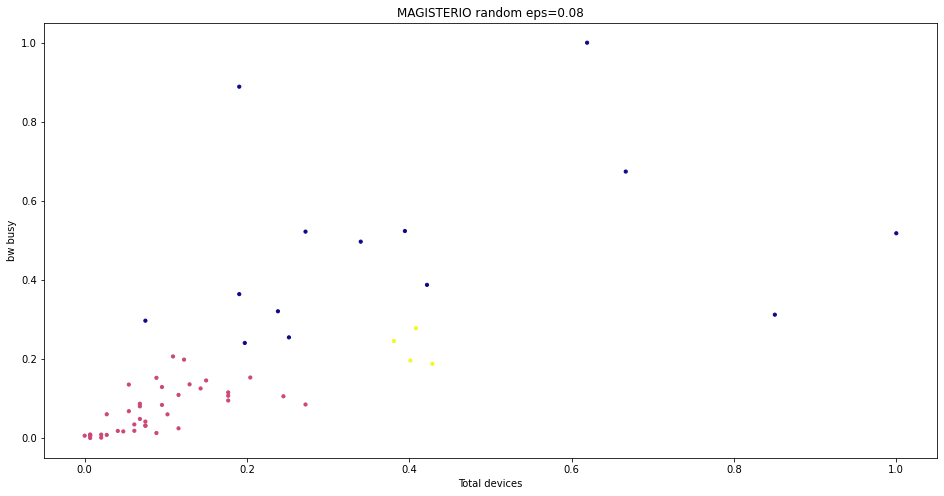

In [16]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan = DBSCAN(eps= 0.08, min_samples= 4)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values
y = df_escalado['bw_busy'].values 

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("MAGISTERIO random eps=0.08")
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters 
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Determining the correct epsilon
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

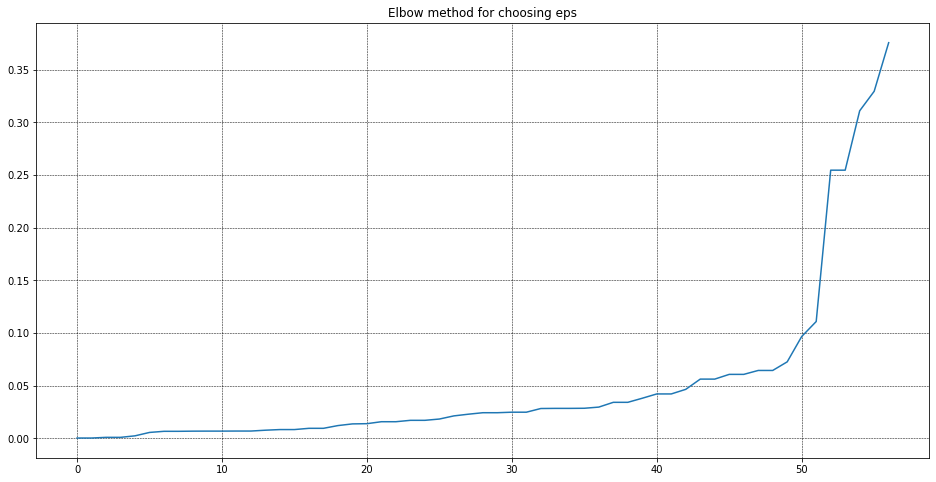

In [17]:
from sklearn.neighbors import NearestNeighbors
# min_samples
n = 4

# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Expand the image
* The limit of x axis --> 110 and 140
* The limit of y axis --> 0 and 10000

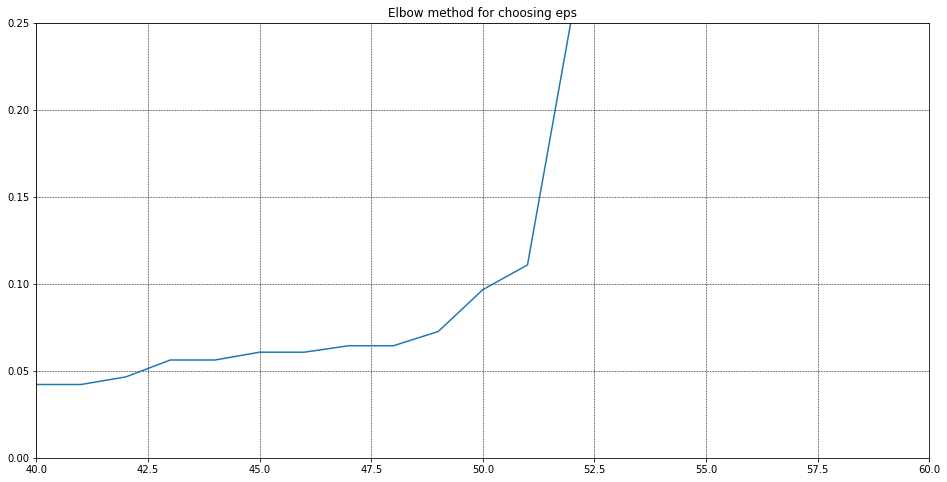

In [18]:
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.ylim(0, 0.25)
plt.xlim(40, 60)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Determine the epsilon
* eps = 0.05
* eps = 0.12

C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\4222091858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


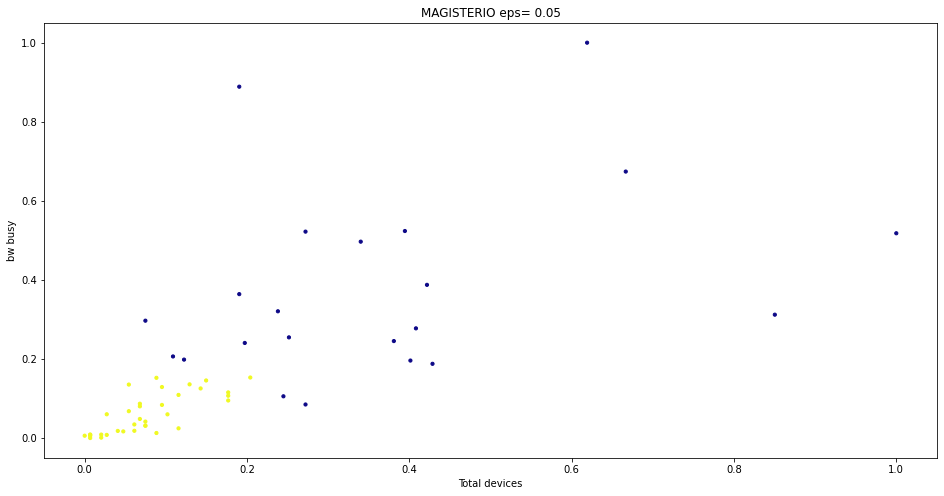

In [19]:
# 1st try with eps = 0.05
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.05

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("MAGISTERIO eps= "+str(e))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Count of cluster

In [20]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,22
0,35


C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_14928\2377901950.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


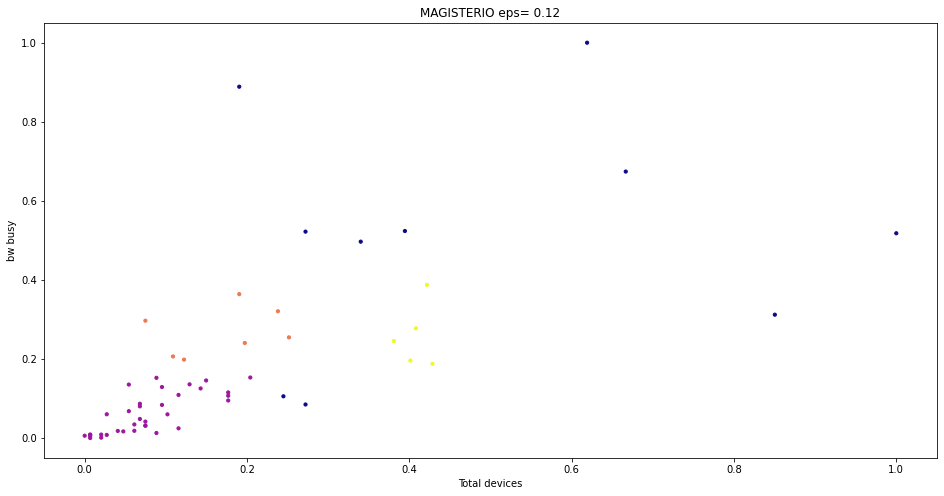

In [21]:
# 2nd try with eps = 0.12
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.12

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("MAGISTERIO eps= "+str(e))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [22]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,10
0,35
1,7
2,5
